In [1]:
import tensorflow 
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing import image  
from tensorflow.keras.models import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
RESIZE_SHAPE = (128, 128)

In [3]:
train_path = 'D:\YEAR 2\SEMESTER 2\PATTERN RECOGNITION & ML\ML PROJECT\Dataset Main\\train'
test_path = 'D:\YEAR 2\SEMESTER 2\PATTERN RECOGNITION & ML\ML PROJECT\Dataset Main\\val'

In [4]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                    

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_data = ImageDataGenerator(rescale = 1./255)

In [7]:
train_set = train_data.flow_from_directory(train_path,target_size = (224,224),batch_size = 16,class_mode = 'categorical')
test_set = test_data.flow_from_directory(test_path,target_size = (224,224),batch_size = 16,class_mode = 'categorical')

Found 5000 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


In [8]:
train_set.class_indices

{'COVID': 0, 'Non-COVID': 1}

In [11]:
sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.1, momentum=0.1)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

In [1]:
covid = model.fit(train_set,validation_data=test_set,epochs=20)

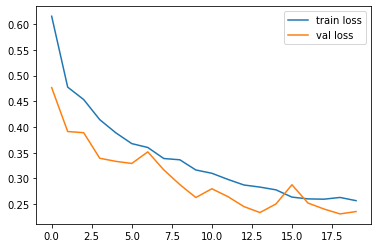

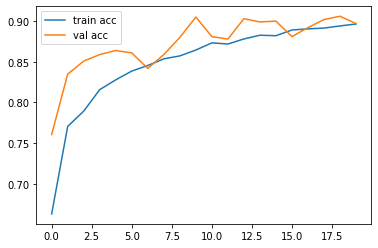

<Figure size 432x288 with 0 Axes>

In [16]:
plt.plot(covid.history['loss'], label='train loss')
plt.plot(covid.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(covid.history['accuracy'], label='train acc')
plt.plot(covid.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')